In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv(r"C:\Users\gurzh\Downloads\ab_test_data.csv")
df.head()

,user_id,timestamp,test_group,conversion
0,7f6833e6-1141-4f20-b4b2-f1e31019b1fd,2023-07-04 04:40:55.848109,a,0
1,e6a6e960-d3f3-4074-a516-ba1e609b211e,2023-07-06 00:26:45.486187,b,0
2,4d3fbfa5-6847-410a-bac2-477f01d5f400,2023-07-10 20:24:33.639464,b,0
3,361457d9-a044-48f7-981c-d67dc3861679,2023-07-20 07:04:49.957013,b,0
4,285cd63d-7d03-427f-a062-1fa2dd2e77d6,2023-07-19 23:27:50.116680,b,0


In [4]:
df.groupby('test_group').describe()

conversion                                             
                count      mean       std  min  25%  50%  75%  max
test_group                                                        
a             10013.0  0.061021  0.239380  0.0  0.0  0.0  0.0  1.0
b              9985.0  0.089034  0.284806  0.0  0.0  0.0  0.0  1.0

In [36]:
# Task 1.1

a = df[df['test_group'] =='a'].value_counts()

b = df[df['test_group'] =='b'].value_counts()
print(f'Group A contains of {a.shape[0]} users')
print(f'Group B contains of {b.shape[0]} users')

Group A contains of 10013 users
Group B contains of 9985 users


In [41]:
# Task 1.2

conv_a = df[(df['test_group'] =='a')  & (df['conversion'] ==1)].shape[0]

conv_b = df[(df['test_group'] =='b')  & (df['conversion'] ==1)].shape[0]

print(f'Conversion in Group A is  {conv_a}')
print(f'Conversion in Group B is  {conv_b}')

Conversion in Group A is  611
Conversion in Group B is  889


In [45]:
# Task 1.3

CR_a = round((conv_a / a.shape[0] * 100),2)
CR_b = round((conv_b / b.shape[0] * 100),2)

print(f'Conversion Rate in Group A is {CR_a}')
print(f'Conversion Rate in Group B is {CR_b}')

Conversion Rate in Group A is 6.1
Conversion Rate in Group B is 8.9


In [86]:
# Task 1.4

from datetime import datetime


df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y.%m.%d')

test_day_start = df['timestamp'].min()
test_day_end = df['timestamp'].max()
test_duration = test_day_end  - test_day_start
print(f'Test started at {test_day_start}')
print(f'Test ended at {test_day_end}')
print(f'Test lasts {test_duration} days = 22 days')


Test started at 2023-07-03 01:42:34.033708
Test ended at 2023-07-25 01:41:19.152664
Test lasts 21 days 23:58:45.118956 days = 22 days


# Task 2
We have categorical variables. It means that we can use here Chi-squer t-test. We know that conversion in group B is heigher then in group A. Also we know that condition of variances equal doesn't work. Is conversion rate in group B  statistically significant?

Null Hypothesis(H0): Conversion in group B is not statistically significant.

Alternative hypothesis(H1): Conversion in group B is greater than in group A.

In [127]:
from scipy import stats
alpha = 0.05

cross_tab = pd.crosstab(df['test_group'], df['conversion'])

statistic, pvalue, dof, expected_values = stats.chi2_contingency(cross_tab)

print(f't-statistic: {round(statistic, 2)}, p-value: {round(pvalue, 2)}')


if pvalue < alpha:
    print('The difference is statistically significant, Null Hypothesis is rejected.')
else:
    print('The difference is insignificant, Null Hypothesis cannot rejected.')

t-statistic: 56.14, p-value: 0.0
The difference is statistically significant, Null Hypothesis is rejected.


Let's apply Permutation test to check whether we have the same result in case the Hypothesis 0 cannot be rejected. 

Null Hypothesis: There is no difference between groups. 

Alternative Hypothesis: There is a significant difference between groups.


In [120]:
def statistic(x, y):
    return stats.ttest_ind(x, y).statistic

alpha = 0.05

x = df[df['test_group'] == 'a']['conversion']
y = df[df['test_group'] == 'b']['conversion']

results = stats.permutation_test((x,y), statistic, n_resamples=1000)

print(f'statistic: {round(results.statistic, 2)}, p-value: {round(results.pvalue, 2)}')

if results.pvalue < alpha:
    print('There is a significant difference between groups. Null Hypothesis is rejected.')
else:
    print('There is no difference between groups. Null Hypothesis cannot rejected.')

statistic: -7.53, p-value: 0.0
There is a significant difference between groups. Null Hypothesis is rejected.


In [100]:
#Task 3

import matplotlib.pyplot as plt
import seaborn as sns

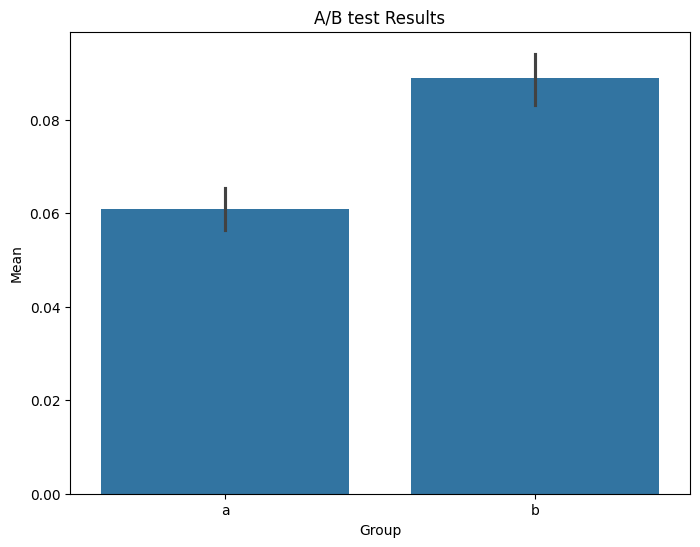

In [102]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df['test_group'],
            y=df['conversion'],
            errorbar=('ci', 95))
plt.title('A/B test Results')
plt.xlabel('Group')
plt.ylabel('Mean')
plt.show()


Task 4

Conclusions

In this particular tet we are testing alternative screen with new design. The question is "Is the conversion rate in group B (control group) statistically significant?"

Problem we are solving: Should we implement alternative new design for enhancing conversion rate?  

We are testing Hypothesis: there is no statistically significant difference between conversion in group B and group A.

Our test has shown that there is significant difference in conversion between control group B and group A.
That means that we should implement our new alternative screen design. 

In [108]:
# Bonus Task
df.sort_values('timestamp', ascending=True, inplace=True)
df.head()

,user_id,timestamp,test_group,conversion
3065,46c4595c-7381-4735-9557-eefe48f16348,2023-07-03 01:42:34.033708,b,0
6667,974b78bf-8483-4f6a-8a8b-95f9bce0226d,2023-07-03 01:46:14.688840,a,0
15979,5f142100-99a4-418b-aa9d-eea849efa926,2023-07-03 01:49:43.283638,b,0
714,f685ef7f-f5d3-4a7c-b4f2-706c8f5f128f,2023-07-03 01:49:54.067114,a,0
2391,706d58f2-2bce-4137-8aa8-20f32db23e45,2023-07-03 01:52:14.910970,a,0


In [117]:
group_a = df[df['test_group'] == 'a']


cum_metric_a = group_a['conversion'].expanding().mean().reset_index(drop=True)


cum_metric_a = pd.DataFrame({
    'timestamp': group_a['timestamp'].reset_index(drop=True),
    'cum_mean': cum_metric_a
})

group_b = df[df['test_group'] == 'b']


cum_metric_b = group_b['conversion'].expanding().mean().reset_index(drop=True)

cum_metric_b = pd.DataFrame({
    'timestamp': group_b['timestamp'].reset_index(drop=True),
    'cum_mean': cum_metric_b
})
cum_metric_b.head()


,timestamp,cum_mean
0,2023-07-03 01:42:34.033708,0.0
1,2023-07-03 01:49:43.283638,0.0
2,2023-07-03 01:52:30.884793,0.0
3,2023-07-03 01:58:41.962846,0.0
4,2023-07-03 01:59:00.602176,0.0


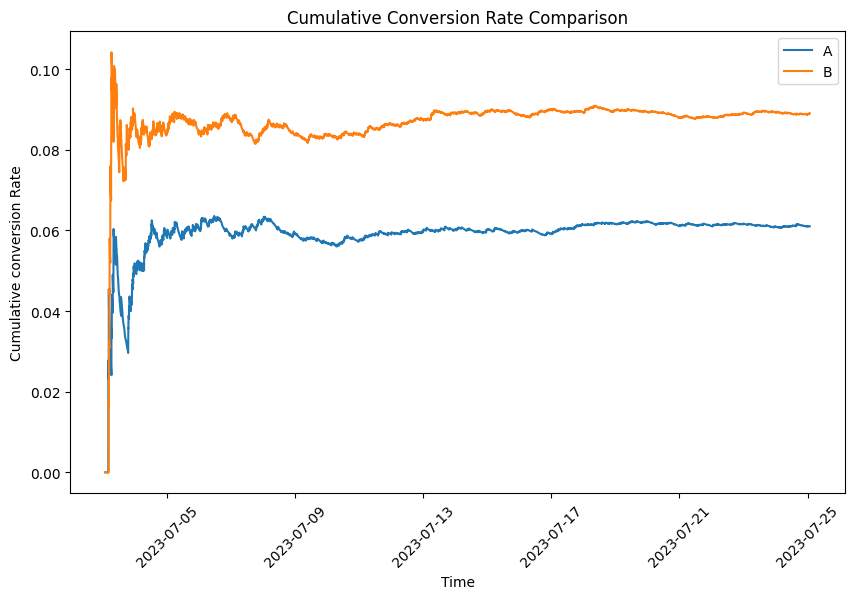

In [115]:

plt.figure(figsize=(10, 6))
plt.plot(cum_metric_a['timestamp'], cum_metric_a['cum_mean'] , label='A')
plt.plot(cum_metric_b['timestamp'], cum_metric_b['cum_mean'] , label='B')
plt.title("Cumulative Сonversion Rate Comparison")
plt.xlabel('Time')
plt.ylabel("Cumulative conversion Rate")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [10]:
df_a = df.query('test_group == "a"')
df_a

,user_id,timestamp,test_group,conversion
0,7f6833e6-1141-4f20-b4b2-f1e31019b1fd,2023-07-04 04:40:55.848109,a,0
7,9b1f084d-8a7f-4526-b859-4935ca99482c,2023-07-17 12:11:21.902593,a,0
9,b856113a-75d4-4911-894c-4d4c75f37c34,2023-07-22 19:38:24.460128,a,0
11,3ebabcc4-eb90-48c0-a527-8beaad80a81a,2023-07-08 10:59:38.914826,a,0
14,b22928dd-1413-4c50-a239-45378cd4f7b3,2023-07-07 19:35:26.669172,a,1
...,...,...,...,...
19989,639e6936-13fa-4adc-ad63-3fefb1e2c9ec,2023-07-20 17:06:44.474891,a,0
19990,cda7c514-6f0c-47d7-b145-09de587781da,2023-07-09 08:40:48.874207,a,0
19991,7568259b-2d61-4b8e-9464-ae344d940dbc,2023-07-15 02:54:16.721869,a,0
19992,4b7b07c4-5221-4b93-ba0d-b3ba55b12c7f,2023-07-04 01:36:10.945000,a,0
